# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: 



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [111]:

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-02 18:58:51--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.139, 74.125.195.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oql49kut9nip8ta72mb5fumd6tbghdus/1677783525000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=0ef202f0-a609-4a01-823b-8071eb2448a0 [following]
--2023-03-02 18:58:51--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oql49kut9nip8ta72mb5fumd6tbghdus/1677783525000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=0ef202f0-a609-4a01-823b-8071eb2448a0
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 74.125.135.132, 2607:f8b0:


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [114]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [116]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv') 
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

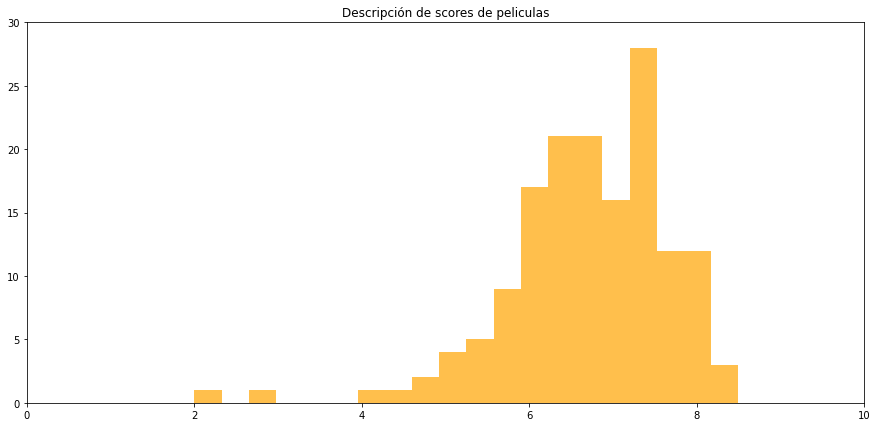

In [171]:
#Espacio para el código de la pregunta 1
df_france = df[df['country'] == "France"]
plt.hist(df_france['imdb_score'], bins=20, alpha=0.7, label='France', color="orange")
plt.grid(False)
plt.title("Descripción de scores de peliculas")
plt.xlabel("")
plt.ylabel("")
plt.xlim(0, 10)
plt.ylim(0, 30)
plt.gcf().set_size_inches(15, 7)

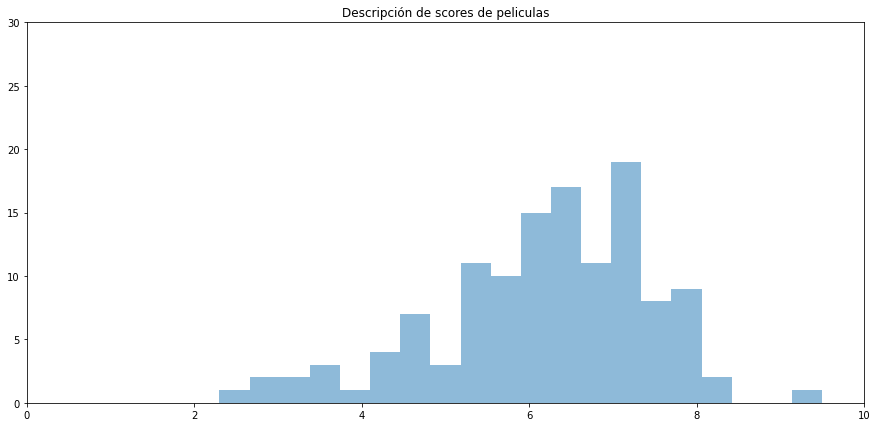

In [172]:
df_canada = df[df['country'] == "Canada"]
plt.hist(df_canada['imdb_score'], bins=20, alpha=0.5, label='Canada')
plt.grid(False)
plt.title("Descripción de scores de peliculas")
plt.xlabel("")
plt.ylabel("")
plt.xlim(0, 10)
plt.ylim(0, 30)
plt.gcf().set_size_inches(15, 7)

**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

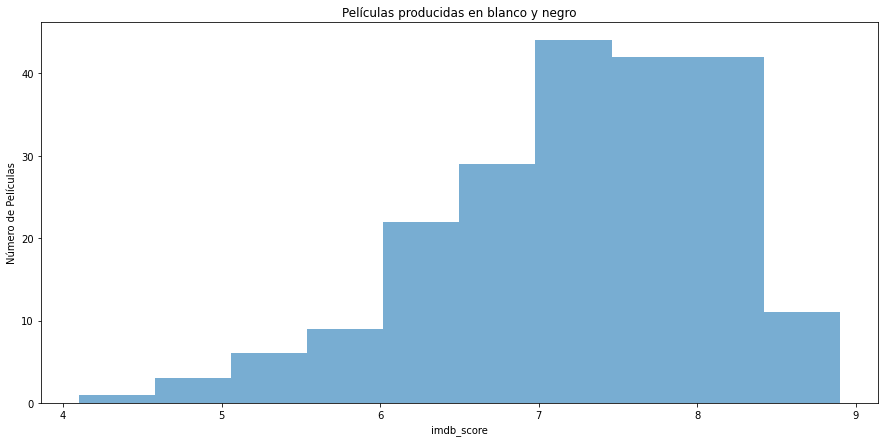

In [173]:
#Espacio para el código de la pregunta 2
df_NaN = df[df['color'] == ' Black and White']
plt.hist(df_NaN['imdb_score'], bins=10, alpha=0.6, label='Blanco y negro')

plt.xlabel('imdb_score')
plt.ylabel('Número de Películas')
plt.title('Películas producidas en blanco y negro')
plt.gcf().set_size_inches(15, 7)

plt.grid(False)

plt.show()

**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



El país con más promedio de películas producidas fue Kyrgyzstan con 8.7 películas


Text(0.5, 1.0, 'Promedio de imdb score por país')

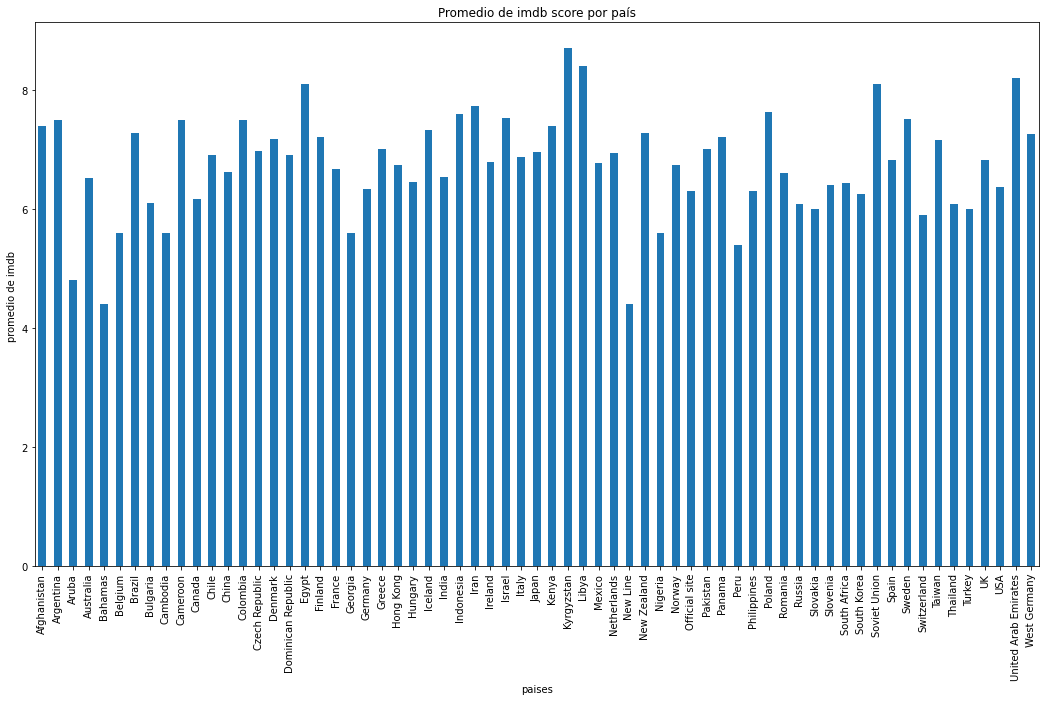

In [160]:
#Espacio para el código de la pregunta 3
count_per_score = df.groupby('country')['imdb_score'].mean()
print(f"El país con más promedio de películas producidas fue {count_per_score.idxmax()} con {count_per_score.max()} películas")
ax = count_per_score.plot.bar(figsize = (18,10))
ax.set_xlabel('paises')
ax.set_ylabel('promedio de imdb ')
ax.set_title("Promedio de imdb score por país")


**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


In [174]:
#Espacio para el código de la pregunta 4
black_and_white_movies = df[df['color'] == ' Black and White']
num_black_and_white_movies = len(black_and_white_movies)

print(f"Hay un total de {num_black_and_white_movies} películas producidas en blanco y negro")

color = df[df['color'] == 'Color']
num_color = len(color)

print(f"Hay un total de {num_color} películas producidas a color")

Hay un total de 209 películas producidas en blanco y negro
Hay un total de 4815 películas producidas a color


**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

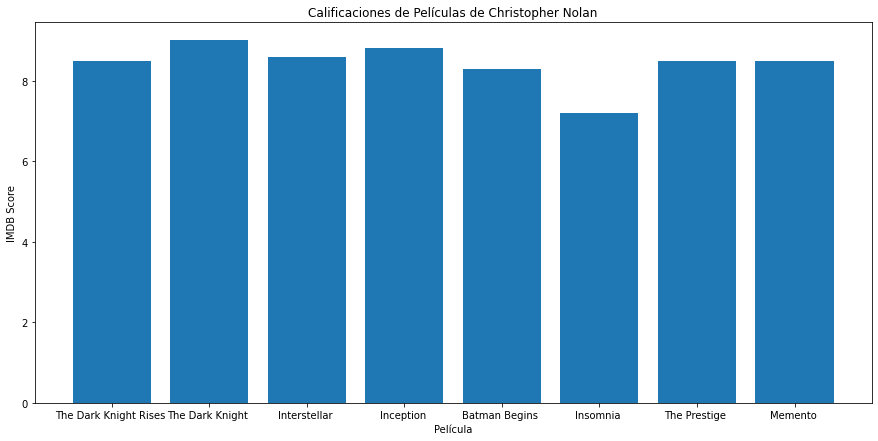

La pelicula de Christopher Nolan tiene la mayor calificación es The Dark Knight 


In [175]:
#Espacio para el código de la pregunta 5

nolan_movies = df[df['director_name'] == 'Christopher Nolan']
max_score_movies = nolan_movies.loc[nolan_movies['imdb_score'].idxmax()]
plt.bar(nolan_movies['movie_title'], nolan_movies['imdb_score'])

plt.title('Calificaciones de Películas de Christopher Nolan')
plt.xlabel('Película')
plt.ylabel('IMDB Score')

plt.gcf().set_size_inches(15, 7)
plt.show()

print(f"La pelicula de Christopher Nolan tiene la mayor calificación es {max_score_movies['movie_title']}")


**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

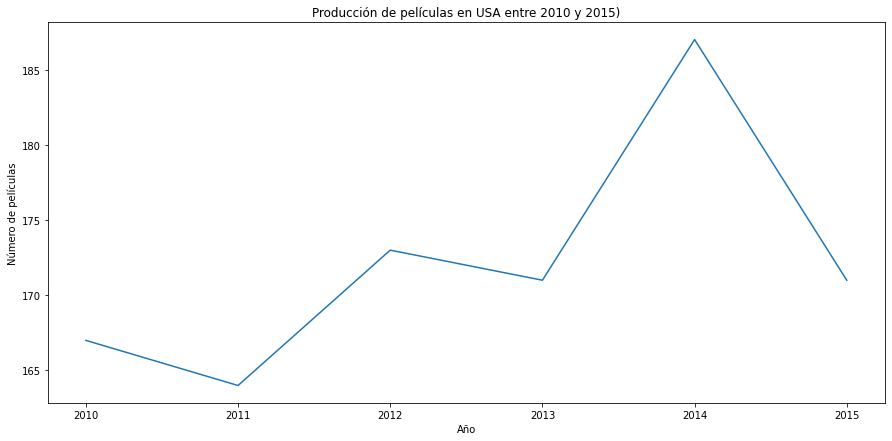

In [178]:
#Espacio para el código de la pregunta 6
usa_movies = df[(df['country'] == 'USA') & (df['title_year'] >= 2010) & (df['title_year'] <= 2015)]

# Contar el número de películas producidas por año
movies_per_year = usa_movies['title_year'].value_counts().sort_index()

# Crear el line chart
plt.plot(movies_per_year.index, movies_per_year.values)
plt.title('Producción de películas en USA entre 2010 y 2015)')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.gcf().set_size_inches(15, 7)
plt.show()

**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

Text(0.5, 1.0, 'IMDb Score Promedio por País')

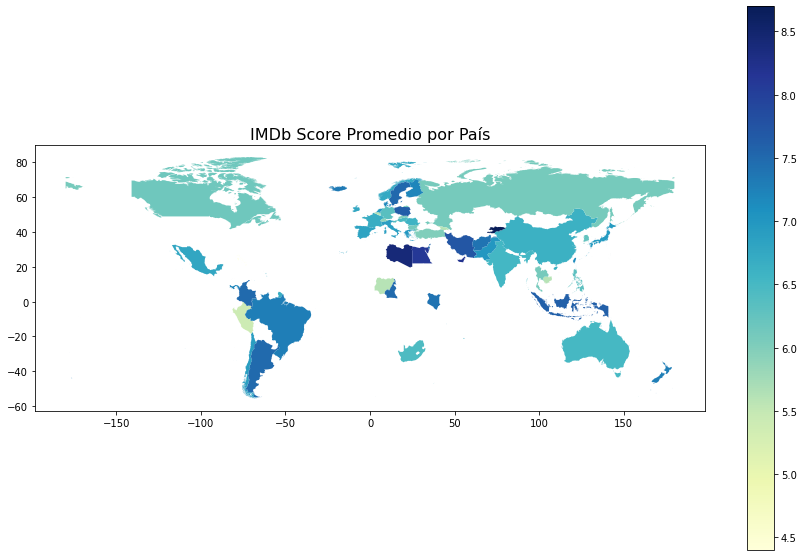

In [177]:
#Espacio para el código de la pregunta 7

count_per_year = df.groupby('country')['imdb_score'].mean()


shpfile = 'IMDBAnalyticsData/Data/Map/ne_10m_admin_0_countries.shp'
world = gpd.read_file(shpfile)
imdb_by_country = df.groupby("country")["imdb_score"].mean().reset_index()
world_imdb = world.merge(imdb_by_country, left_on="NAME", right_on="country")
# Crear el mapa
ax = world_imdb.plot(column="imdb_score", cmap="YlGnBu", figsize=(15, 10), legend=True)
ax.set_title("IMDb Score Promedio por País", fontsize=16)

**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


La analítica de datos que se podría realizar en nuestro proyecto se aplica más que todo al sistema de **match**, debemos enviar recomendaciones de las personas que tengan intereses en común, debemos tomar los juegos en común y tratar de realizar la comparación para de esta manera retornar las personas con gustos parecidos al de la persona que está haciendo el match.